In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### NaturDoc - TL BL WT 22-23

# Data clustering:

## Groundwork: Approaches and Dummy Data

What approaches are possible? And while waiting for the input data to be generated, what data can we use to already test these approaches?

### Placeholder Data:
Use Kaggle data for now as it has a similar shape to what we expect the output from our embeddings to be like:

https://www.kaggle.com/datasets/louise2001/embeddings-actuarial-loss-competition?select=embeddings_train_20.csv
https://www.kaggle.com/datasets/louise2001/embeddings-actuarial-loss-competition?select=embeddings_test_20.csv

#### Loading Placeholders:

In [2]:
placeholder_embeddings_train = pd.read_csv("../data/kaggle_embeddings/embeddings_train_20.csv")
placeholder_embeddings_test = pd.read_csv("../data/kaggle_embeddings/embeddings_test_20.csv")

In [3]:
print(placeholder_embeddings_train.shape)
placeholder_embeddings_train.head(1)

(54000, 20)


,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19
0,0.001261,0.002414,0.000249,0.00522,-0.001958,0.00038,-0.002064,-0.001011,0.002508,-0.002613,-0.000296,-0.001507,-0.006224,-0.002091,-0.003988,-0.002253,-0.000157,-0.004382,-0.001747,0.000572


In [4]:
print(placeholder_embeddings_test.shape)
placeholder_embeddings_test.head(1)

(36000, 20)


,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19
0,-0.003337,-0.000376,0.000312,0.002878,0.000442,0.000024,0.003665,-0.004803,-0.004482,0.00339,0.004925,0.001668,-0.002745,-0.001031,0.000992,-0.005981,-0.002522,-0.000863,0.000206,-0.003104


### Overview of Possible Approches:

One basic question: _What will be our output?_

#### Approach 1: Similarity Matrix

* Output a dictionary symptoms -> activities

* How do we define the threshold? Await embedding data

* Meantime: __similarity problem - what if no activity is near them?__

This approach does not use ML models, but can provide results for the app already.

#### Approach 2: Clustering

422 symptoms - > number of centroids?

Approach clustering:

1. Kmeans - groups (soft clustering?) -> groups with soft clustering
    - Assume Globular data structure
    - Disconsider outliers
    - Vary the results according to the inicialization
 
- __Output -> Groups/ Soft Groups__

2. HDBSCAN*
    - It's based on density
    - It adapts better with different data structures
    - Classify outliers according to our epslon(parameter)
    - They are deterministic

- __Output (Group & outliers) / (Soft group & outlier)__

#### Approach 3: Classification

Requires some of the previous steps to be done already!

Supervised classification approach (K n n):

* embeddings, symptoms as y
* 422 labels (i.e. symptoms) - assign closest symptom possible to each activity

A way to "label" our data, enforce no null values. Could lead to stupid matches due to this because there's no threshold, so to speak

## Approach 1: Distance Matrix

### Pseudocode:

In [5]:
# from typing import Dict, List

# def generate_distance_matrix_df(df : pd.DataFrame, # ~2.5k x 300
#                 distance_metric : str) -> pd.DataFrame: # 2.5k x 2.5k

# def generate_dict(df_dist : pd.DataFrame,
#                 threshold : float) -> Dict[str: List[str]]:

### Implementation:

#### Creating the Distance Matrix:

In [6]:
# importing the library
from scipy.spatial import distance
from scipy.spatial import distance_matrix

##### On Distance Metrics:

Source: Pulkit Sharma 

https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

In [7]:
# defining the points
point_1 = (1, 2, 3)
point_2 = (4, 5, 6)

In [8]:
# computing the euclidean distance
manhattan_distance = distance.euclidean(point_1, point_2)
print('Euclidean Distance b/w', point_1, 'and', point_2, 'is: ', manhattan_distance)

Euclidean Distance b/w (1, 2, 3) and (4, 5, 6) is:  5.196152422706632


In [9]:
# computing the manhattan distance
manhattan_distance = distance.cityblock(point_1, point_2)
print('Manhattan Distance b/w', point_1, 'and', point_2, 'is: ', manhattan_distance)

Manhattan Distance b/w (1, 2, 3) and (4, 5, 6) is:  9


"_The p parameter of the Minkowski Distance metric of SciPy represents the order of the norm. When the order(p) is 1, it will represent Manhattan Distance and when the order in the above formula is 2, it will represent Euclidean Distance. 3 is Minkowski distance._"

In [10]:
# computing the minkowski distance
minkowski_distance = distance.minkowski(point_1, point_2, p=3)
print('Minkowski Distance b/w', point_1, 'and', point_2, 'is: ', minkowski_distance)

Minkowski Distance b/w (1, 2, 3) and (4, 5, 6) is:  4.3267487109222245


"_Hamming Distance measures the similarity between two strings of the same length. The Hamming Distance between two strings of the same length is the number of positions at which the corresponding characters are different._"

"_'euclidean' and 'manhattan'_

_Since the length of these strings is equal, we can calculate the Hamming Distance. We will go character by character and match the strings. The first character of both the strings (e and m, respectively) is different. Similarly, the second character of both the strings (u and a) is different. and so on._

_Look carefully – seven characters are different, whereas two characters (the last two characters) are similar:_"

In [11]:
# defining two strings
string_1 = 'euclidean'
string_2 = 'manhattan'

# computing the hamming distance
hamming_distance = distance.hamming(list(string_1), list(string_2))*len(string_1)
print('Hamming Distance b/w', string_1, 'and', string_2, 'is: ', hamming_distance)

Hamming Distance b/w euclidean and manhattan is:  7.0


In [12]:
dis_matrix = distance.euclidean(placeholder_embeddings_train.loc[:, "X_0"], placeholder_embeddings_train.loc[:, "X_0"])

In [13]:
dis_matrix

0.0

##### Generating Distance Matrix:

distance_matrix from Scipy already is basically like the function we defined up top in Pseudocode, just doesn't return a pandas DFbut an array instead:

In [14]:
dis_matrix = distance_matrix(placeholder_embeddings_train[:10].values, placeholder_embeddings_train[:10].values)

In [17]:
dis_matrix[:3]

array([[0.        , 0.01833721, 0.02229426, 0.02335984, 0.01876052,
        0.0230069 , 0.01400243, 0.01788264, 0.0204466 , 0.02135449],
       [0.01833721, 0.        , 0.01937967, 0.01992352, 0.01889556,
        0.02113967, 0.01649485, 0.0183124 , 0.01714963, 0.02174769],
       [0.02229426, 0.01937967, 0.        , 0.01706631, 0.0174461 ,
        0.02115377, 0.01890491, 0.02020323, 0.01590942, 0.02505969]])

In [18]:
import math

def generate_distance_matrix(df : pd.DataFrame, # ~2.5k x 300
                size: int,
                distance_metric : str = "euclidean") -> pd.DataFrame: # 2.5k x 2.5k
    if distance_metric == "manhattan":
        p = 1
    elif distance_metric == "euclidean":
        p = 2
    elif distance_metric == "chebychev":
        p = math.inf
    else:
        p = 2
    dis_matrix = distance_matrix(df[:size].values, df[:size].values, p)
    dis_df = pd.DataFrame(dis_matrix)
    return dis_df


In [20]:
df_dist = generate_distance_matrix(placeholder_embeddings_train, 2500)
df_dist

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.000000,0.018337,0.022294,0.023360,0.018761,0.023007,0.014002,0.017883,0.020447,0.021354,...,0.019683,0.016055,0.012654,0.013704,0.017819,0.021642,0.015601,0.018090,0.019478,0.022697
1,0.018337,0.000000,0.019380,0.019924,0.018896,0.021140,0.016495,0.018312,0.017150,0.021748,...,0.016862,0.017062,0.018973,0.017938,0.016172,0.016623,0.015493,0.018303,0.023041,0.020298
2,0.022294,0.019380,0.000000,0.017066,0.017446,0.021154,0.018905,0.020203,0.015909,0.025060,...,0.016655,0.021222,0.022874,0.018406,0.017896,0.015341,0.017457,0.021428,0.022936,0.025871
3,0.023360,0.019924,0.017066,0.000000,0.020977,0.017337,0.020286,0.022109,0.022587,0.024175,...,0.017900,0.019122,0.023323,0.017697,0.020562,0.010699,0.018227,0.020388,0.021986,0.021899
4,0.018761,0.018896,0.017446,0.020977,0.000000,0.019244,0.015439,0.015941,0.020238,0.022915,...,0.015841,0.021323,0.019469,0.013780,0.015469,0.019880,0.017473,0.019232,0.020719,0.021729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.021642,0.016623,0.015341,0.010699,0.019880,0.020699,0.019238,0.020034,0.017647,0.024520,...,0.017746,0.017464,0.022954,0.017979,0.015548,0.000000,0.019693,0.020573,0.022701,0.022759
2496,0.015601,0.015493,0.017457,0.018227,0.017473,0.016619,0.014155,0.017927,0.020330,0.019178,...,0.015454,0.015248,0.016167,0.015261,0.020345,0.019693,0.000000,0.016253,0.016326,0.018418
2497,0.018090,0.018303,0.021428,0.020388,0.019232,0.021677,0.011484,0.017825,0.022029,0.016044,...,0.019790,0.013730,0.018533,0.021361,0.019769,0.020573,0.016253,0.000000,0.024841,0.024082
2498,0.019478,0.023041,0.022936,0.021986,0.020719,0.019593,0.017781,0.020926,0.024572,0.025625,...,0.016534,0.022633,0.021300,0.018761,0.022967,0.022701,0.016326,0.024841,0.000000,0.026342


##### Notes/Questions:

How does it treat the various columns?

As we can see, the initial DF contains columns X_0 to X_19:

In [20]:
placeholder_embeddings_train.head(2)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19
0,0.001261,0.002414,0.000249,0.00522,-0.001958,0.000380,-0.002064,-0.001011,0.002508,-0.002613,-0.000296,-0.001507,-0.006224,-0.002091,-0.003988,-0.002253,-0.000157,-0.004382,-0.001747,0.000572
1,-0.000088,0.001643,0.000621,-0.00249,-0.002422,0.005155,0.001171,-0.000432,0.003041,0.000422,0.005695,0.003395,0.002880,-0.002275,0.000133,0.000864,0.001519,-0.001895,0.002235,-0.005475


#### Generating the Final Dictionary:

Pseudocode reminder:

    def generate_dict(df_dist : pd.DataFrame,
                    threshold : float) -> Dict[str: List[str]]:

##### A Look at the Current Values:

To get an idea of what kind of threshold make sense, let's have a look at what the values for a single column look like:

In [21]:
df_dist.loc[:, 0].max()

0.028964466307144915

In [22]:
df_dist.loc[:, 0].min()

0.0

In [23]:
df_dist.loc[:, 0].mean()

0.018915711681037534

In [24]:
df_dist.loc[:, 0].median()

0.018989220851592256

In [25]:
df_dist.loc[1:, 0].min()

0.009865616955502936

The maximum value in the similarity matrix is about 0.02896, the minimum is 0.0. 0.0 indicates absolute similarity and in this similarity matrix happens when rows and columns refer to the same initial data entry (so at (0,0), (1,1), (2,2) and so on).The mean lies at around 0.01892, with the median a bit higher at about 0.01899.

Looking at the minimum value where similarity is not referenced relevant to the entry itself, (so in column 0, from row 1 onwards), we have about 0.00987 as a minimum value. We should therefore aim to have a threshold above this.

In [26]:
def generate_dict(df_dist : pd.DataFrame,
                threshold : float) -> dict:
    filt = (df_dist[:] > threshold)
    df_filt = df_dist.copy()
    df_filt[filt] = np.nan
    dict_dist = df_filt.to_dict('dict')
    for i, dic in dict_dist.items():
        to_pop = list()
        for key, value in dic.items():
            if np.isnan(value):
                to_pop.append(key)
        for target_key in to_pop:
            dic.pop(target_key)
        dict_dist[i] = dic
    return dict_dist


In [27]:
dict_dist = generate_dict(df_dist, 0.01)

Taking a look at the first three dictionary entries:

In [28]:
print({k: dict_dist[k] for k in list(dict_dist)[:3]})

{0: {0: 0.0, 2129: 0.009865616955502936}, 1: {1: 0.0, 1442: 0.009090214144652664}, 2: {2: 0.0, 331: 0.004564570289016823, 519: 0.00807144459771451, 882: 0.009418857621319714, 1295: 0.009711389379776076, 1381: 0.008968525404032446, 1431: 0.009418857621319714}}


How do we identify which point is which? By their index position?

## Approach 2: HDBSCAN

### Learning Resources:

[HDBSCAN documentation](https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#distance-matrices)

[HDBSCAN presentation](https://www.youtube.com/watch?v=dGsxd67IFiU)

### Example Projects:

[The Simple Case](https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#the-simple-case)

_Further steps and details in the official HDBSCAN [documentation](https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#distance-matrices)._

Scatterplotting a distance matrix seems a little tricky. We can specifically target given columns to show the distance vectors of a specific row relative to an indicated column. In this case, when we target both column 1 and row 1, we receive a linear scatterplot indicating the distance:

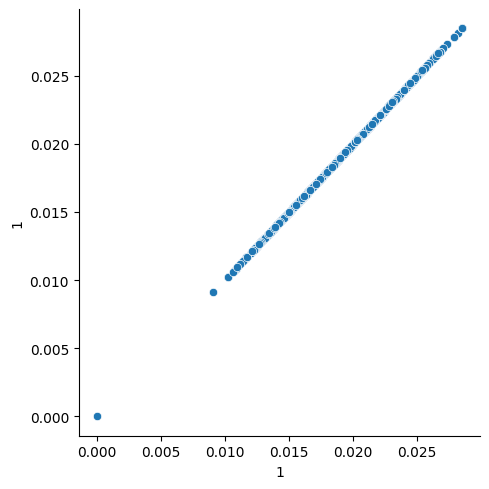

In [92]:
sns.relplot(data=df_dist, x=1, y=1)

Comparing two different rows and columns, we receive this kind of blob instead:

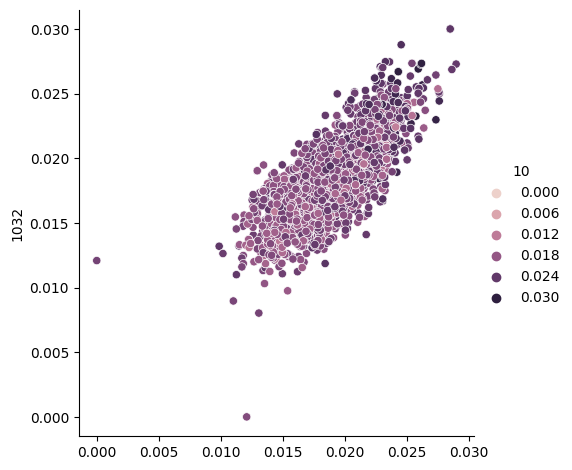

In [87]:
sns.relplot(data=df_dist, x=0, y=1032, hue=10)

Plotting data from the initial dataframe might be more indicative of where data lands:

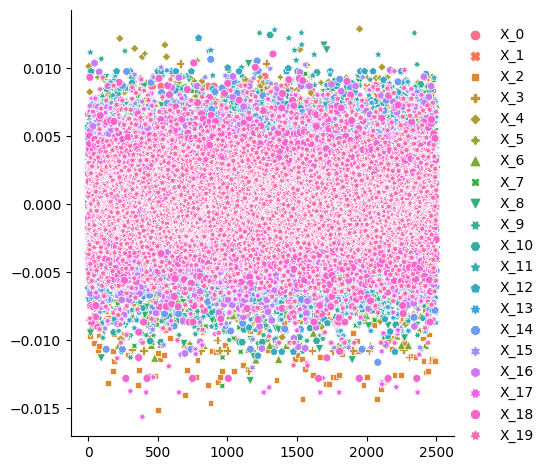

In [91]:
sns.relplot(data=placeholder_embeddings_train[:2500])

We import the hdbscan library:

In [29]:
import hdbscan

To start clustering, we need to instantiate a clustering object that we can then fit our dataframe to. It is possible to chain methods.

In [123]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(placeholder_embeddings_train[:2500])

HDBSCAN()

Every point is assigned a label (minimum cluster size etc. can be adjusted):

In [128]:
print(len(clusterer.labels_))
print(set(clusterer.labels_))

2500
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, -1}


From the documentation:

    The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). You can access these scores via the probabilities_ attribute.

In [129]:
print(len(clusterer_distance.probabilities_))
print(set(clusterer_distance.probabilities_[::10]))

2500
{0.0, 0.9719165494869637, 0.9180965588733512, 1.0, 0.8771970527966721, 0.9866043230347656, 0.9426448558332632, 0.7664689611301424, 0.8448398056959175, 0.6077575659049572, 0.8773918052975406, 0.9589372579703835, 7.888641895741636e-07, 0.9570990651215855, 0.4390150510707592, 0.9300432758126633, 0.958019282673652}


For a distance matrix, we need to indicate (metric='precomputed'):

In [102]:
clusterer_distance = hdbscan.HDBSCAN(metric='precomputed')
clusterer_distance.fit(df_dist)
print(set(clusterer_distance.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, -1}


Probablilities:

In [121]:
print(len(clusterer_distance.probabilities_))
print(set(clusterer_distance.probabilities_[::10]))

2500
{0.0, 0.9719165494869637, 0.9180965588733512, 1.0, 0.8771970527966721, 0.9866043230347656, 0.9426448558332632, 0.7664689611301424, 0.8448398056959175, 0.6077575659049572, 0.8773918052975406, 0.9589372579703835, 7.888641895741636e-07, 0.9570990651215855, 0.4390150510707592, 0.9300432758126633, 0.958019282673652}


### Attempts at visualising the scatterplots:

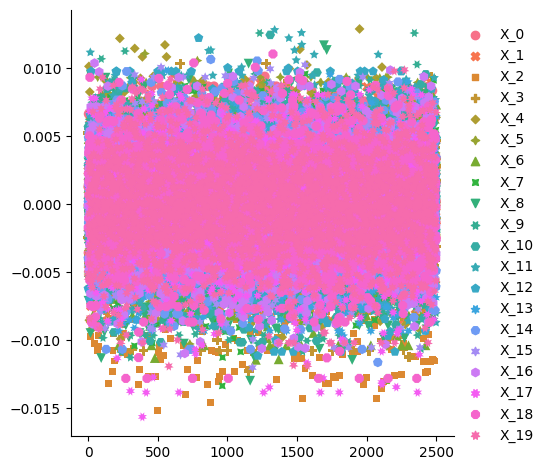

In [193]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(placeholder_embeddings_train[:2500])
color_palette = sns.color_palette('deep', 20)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
sns.relplot(data=placeholder_embeddings_train[:2500], s=50, linewidth=0, color=cluster_member_colors)

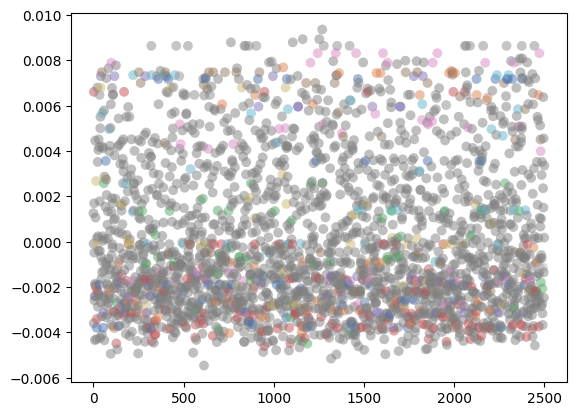

In [194]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(placeholder_embeddings_train[:2500])
color_palette = sns.color_palette('deep', 1000)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(range(2500), placeholder_embeddings_train[:2500]["X_0"], s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

## Looking Ahead:

In the following notebook, we will prepare our data for the word embeddings by creating a new dataset that contains all the "activities" from Dr. Duke's Ethnobotanical database, as well as the symptoms that we want to use as the user-selectable symptoms in the NaturDoc application.